In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(r'C:\Users\User\Desktop\P\top50.csv')
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [9]:
df.shape

(50, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Track.Name        50 non-null     object
 1   Artist.Name       50 non-null     object
 2   Genre             50 non-null     object
 3   Beats.Per.Minute  50 non-null     int64 
 4   Energy            50 non-null     int64 
 5   Danceability      50 non-null     int64 
 6   Loudness..dB..    50 non-null     int64 
 7   Liveness          50 non-null     int64 
 8   Valence.          50 non-null     int64 
 9   Length.           50 non-null     int64 
 10  Acousticness..    50 non-null     int64 
 11  Speechiness.      50 non-null     int64 
 12  Popularity        50 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 5.2+ KB


In [14]:
df.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [15]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values per column:\n{missing_values}")

Missing values per column:
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64


In [21]:
# Step 5: Remove duplicates
df.drop_duplicates(inplace=True)


In [20]:
df.shape

(50, 13)

In [98]:
df.duplicated().sum()

0

In [48]:
#Rename columns for easier access
df.rename(columns={
    'Loudness..dB..': 'loudness(dB)',
    'Valence.': 'Valence',
    'Length.': 'Length',
    'Acousticness..': 'Acousticness',
    'Speechiness.': 'Speechiness',
}, inplace=True)

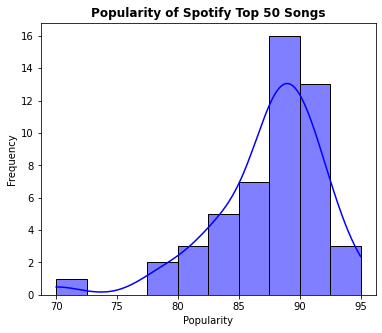

In [107]:
# 1. Distribution of Popularity
plt.figure(figsize=(6, 5))
sns.histplot(df['Popularity'], bins=10, kde=True, color='blue')
plt.title('Popularity of Spotify Top 50 Songs',fontweight='bold')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()



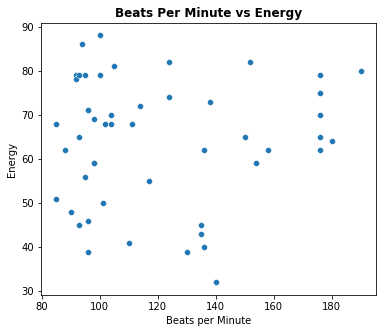

In [108]:
# 2. BPM vs Energy (Scatter plot)
plt.figure(figsize=(6, 5))
sns.scatterplot(x='Beats.Per.Minute', y='Energy', data=df)
plt.title('Beats Per Minute vs Energy',fontweight='bold')
plt.xlabel('Beats per Minute')
plt.ylabel('Energy')
plt.show()

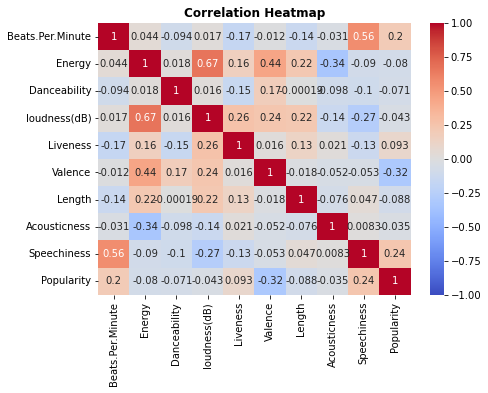

In [116]:
# 3. Heatmap
corr_matrix = df[['Beats.Per.Minute', 'Energy', 'Danceability', 'loudness(dB)', 'Liveness', 'Valence', 'Length', 'Acousticness','Speechiness',
 'Popularity']].corr()
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap',fontweight='bold')
plt.show()

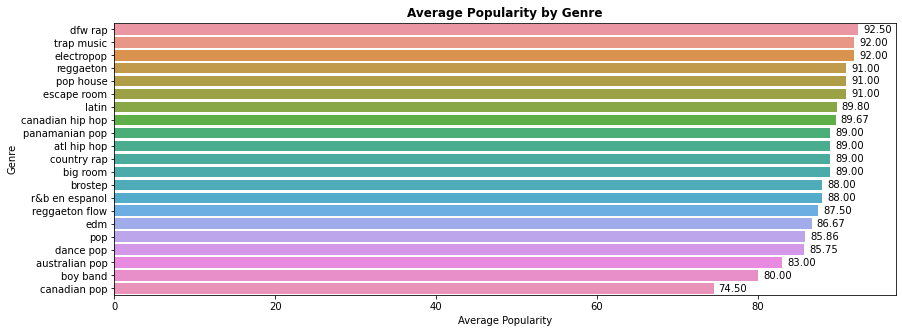

In [104]:
# 5. Bar Plot of Average Popularity by Genre
plt.figure(figsize=(14, 5))
 
avg_popularity_by_genre = df.groupby('Genre')['Popularity'].mean().reset_index()
# Sort the values by popularity in descending order
avg_popularity_by_genre = avg_popularity_by_genre.sort_values('Popularity', ascending=False)

ax = sns.barplot(x='Popularity', y='Genre', data=avg_popularity_by_genre)

# Add data labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',  # Display the value with 2 decimal places
                (p.get_width(), p.get_y() + p.get_height() / 2),  # Position the label at the end of each bar
                va= 'center' , fontsize=10, color='black', xytext=(5, 0), textcoords='offset points')
    
plt.title('Average Popularity by Genre',fontweight='bold')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.show()

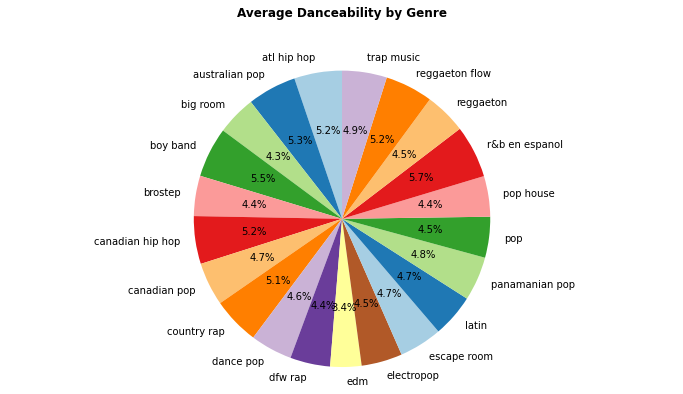

In [98]:
# Plot a pie chart for average danceability by genre
plt.figure(figsize=(12, 6))
avg_danceability_by_genre = df.groupby('Genre')['Danceability'].mean().reset_index()


plt.pie(avg_danceability_by_genre['Danceability'], 
        labels=avg_danceability_by_genre['Genre'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=plt.cm.Paired.colors)

# Add title and display the pie chart
plt.title('Average Danceability by Genre', y=1.10,fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()